In [1]:
#Name: Domala Vamshikrishna
#Date:03-12-2021
#Model: Gradient Boosting
#station:41047
#Hyperparameter tuning using Randomsearch
#average wave period Prediction
#data website:  https://www.ndbc.noaa.gov/

In [2]:
import csv
import numpy as np
import folium
import pandas as pd
import math
from matplotlib import pyplot as plt

In [3]:
#sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#min_samples_split: Defines the minimum no. of samples which are required in a node to be considered for splitting

#min_samples_leaf: Defines the minimum samples required in a terminal node or leaf

#min_weight_leaf: Similar to min_samples_leaf but defined as a fraction
#of the total number of observations instead of an integer.
#Only one of #2 and #3 should be defined.

#max_depth: The maximum depth of a tree. Should be tuned using CV.

#max_leaf_nodes: The maximum number of terminal nodes or leaves in a tree.
#If this is defined, GBM will ignore max_depth.

#max_features:
#The number of features to consider while searching for a best split. These will be randomly selected.
#As a thumb-rule, square root of the total number of features works great but we should check upto 
#30-40% of the total number of features.
#Higher values can lead to over-fitting but depends on case to case


In [4]:
train = pd.read_excel("41047h_Training.xlsx")

In [5]:
corr=train.corr(method='pearson')
corr

,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,WTMP_deg,DEWP_deg
WDIR_deg,1.000000,-0.083495,-0.071898,-0.028022,-0.019392,0.001630,0.289847,-0.303824,0.009257,-0.029264,0.008476
WSPD_m/s,-0.083495,1.000000,0.987837,0.622174,0.005358,-0.066718,0.076161,-0.147054,-0.253535,-0.263866,-0.101170
GST_m/s,-0.071898,0.987837,1.000000,0.669209,0.035750,-0.008218,0.083799,-0.156283,-0.269234,-0.261829,-0.106855
WVHT_m,-0.028022,0.622174,0.669209,1.000000,0.399958,0.618020,0.052864,-0.199379,-0.345457,-0.296086,-0.216701
DPD_sec,-0.019392,0.005358,0.035750,0.399958,1.000000,0.677538,-0.246300,-0.059495,-0.166430,-0.136618,-0.189492
APD_sec,0.001630,-0.066718,-0.008218,0.618020,0.677538,1.000000,-0.117475,-0.091748,-0.223729,-0.157230,-0.223914
MWD_deg,0.289847,0.076161,0.083799,0.052864,-0.246300,-0.117475,1.000000,-0.122268,-0.019170,-0.014749,-0.012126
PRES_hpa,-0.303824,-0.147054,-0.156283,-0.199379,-0.059495,-0.091748,-0.122268,1.000000,-0.196204,-0.159511,-0.080103
ATMP_deg,0.009257,-0.253535,-0.269234,-0.345457,-0.166430,-0.223729,-0.019170,-0.196204,1.000000,0.919570,0.626586
WTMP_deg,-0.029264,-0.263866,-0.261829,-0.296086,-0.136618,-0.157230,-0.014749,-0.159511,0.919570,1.000000,0.560544


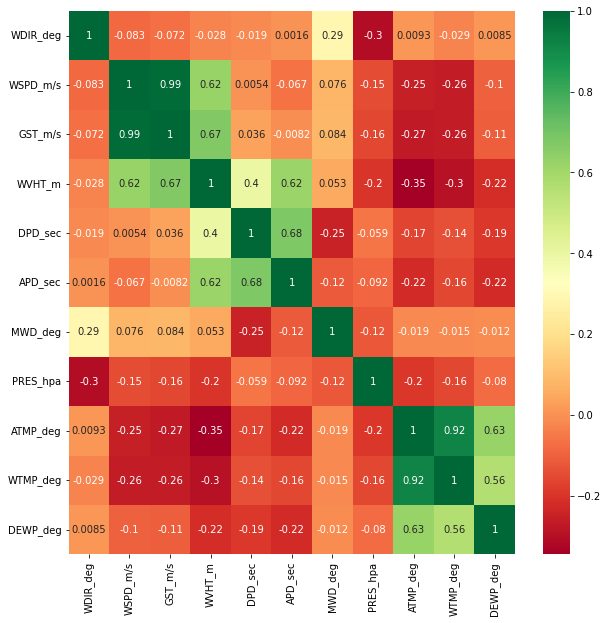

In [6]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:>

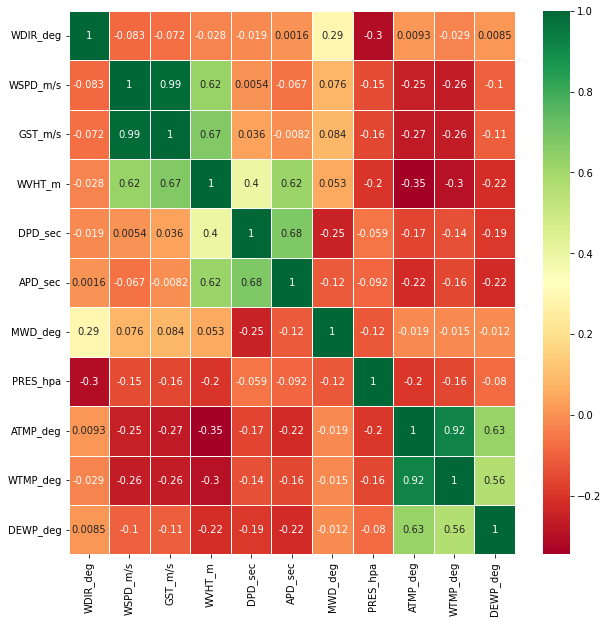

In [7]:
import seaborn as sb
plt.figure(figsize=(10,10))
sb.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn', annot=True, linewidth=0.5)

In [8]:
Xtrain = train.iloc[:,[1,2,3,4,5,7,8,10]]
ytrain = train.iloc[:,6]

In [9]:
from sklearn.ensemble import GradientBoostingRegressor as gtb
greg=gtb()

In [10]:
from sklearn.model_selection import RandomizedSearchCV
random_grid=[{'learning_rate':[0.001,0.01,0.1,1], 'n_estimators':[1000,2000,4000,8000],'min_samples_leaf':[2,4,8,12], 
             'max_features':[0.1,0.3,0.6,0.9], 'max_depth':[2,5,15,20], 'min_samples_split':[2,3,4,5]}]

In [11]:
random_search=RandomizedSearchCV(greg, random_grid, cv=5, n_jobs=4)


In [12]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [13]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search=random_search.fit(Xtrain,ytrain.ravel())
timer(start_time) # timing ends here for "start_time" variable


 Time taken: 1 hours 4 minutes and 12.48 seconds.


In [14]:
random_search.best_params_

{'n_estimators': 4000,
 'min_samples_split': 5,
 'min_samples_leaf': 12,
 'max_features': 0.6,
 'max_depth': 15,
 'learning_rate': 0.001}

In [15]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [16]:
display(random_search)

Best parameters are: {'n_estimators': 4000, 'min_samples_split': 5, 'min_samples_leaf': 12, 'max_features': 0.6, 'max_depth': 15, 'learning_rate': 0.001}


0.808 + or -0.031 for the {'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.6, 'max_depth': 20, 'learning_rate': 0.01}
0.583 + or -0.063 for the {'n_estimators': 8000, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': 0.3, 'max_depth': 15, 'learning_rate': 1}
0.803 + or -0.026 for the {'n_estimators': 4000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 0.3, 'max_depth': 15, 'learning_rate': 0.001}
0.81 + or -0.03 for the {'n_estimators': 4000, 'min_samples_split': 5, 'min_samples_leaf': 12, 'max_features': 0.6, 'max_depth': 15, 'learning_rate': 0.001}
0.802 + or -0.027 for the {'n_estimators': 2000, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.3, 'max_depth': 15, 'learning_rate': 0.01}
0.798 + or -0.035 for the {'n_estimators': 4000, 'min_samples

In [17]:
print('best estimators are:  ', random_search.best_estimator_)
print('best parameters are: ', random_search.best_params_)

best estimators are:   GradientBoostingRegressor(learning_rate=0.001, max_depth=15, max_features=0.6,
                          min_samples_leaf=12, min_samples_split=5,
                          n_estimators=4000)
best parameters are:  {'n_estimators': 4000, 'min_samples_split': 5, 'min_samples_leaf': 12, 'max_features': 0.6, 'max_depth': 15, 'learning_rate': 0.001}


In [9]:
from sklearn.ensemble import GradientBoostingRegressor as gtb
greg=gtb(learning_rate=0.001, max_depth=15, max_features=0.6,
                          min_samples_leaf=12, min_samples_split=5,
                          n_estimators=4000)
greg.fit(Xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=15, max_features=0.6,
                          min_samples_leaf=12, min_samples_split=5,
                          n_estimators=4000)

In [10]:
y_pred = greg.predict(Xtrain)

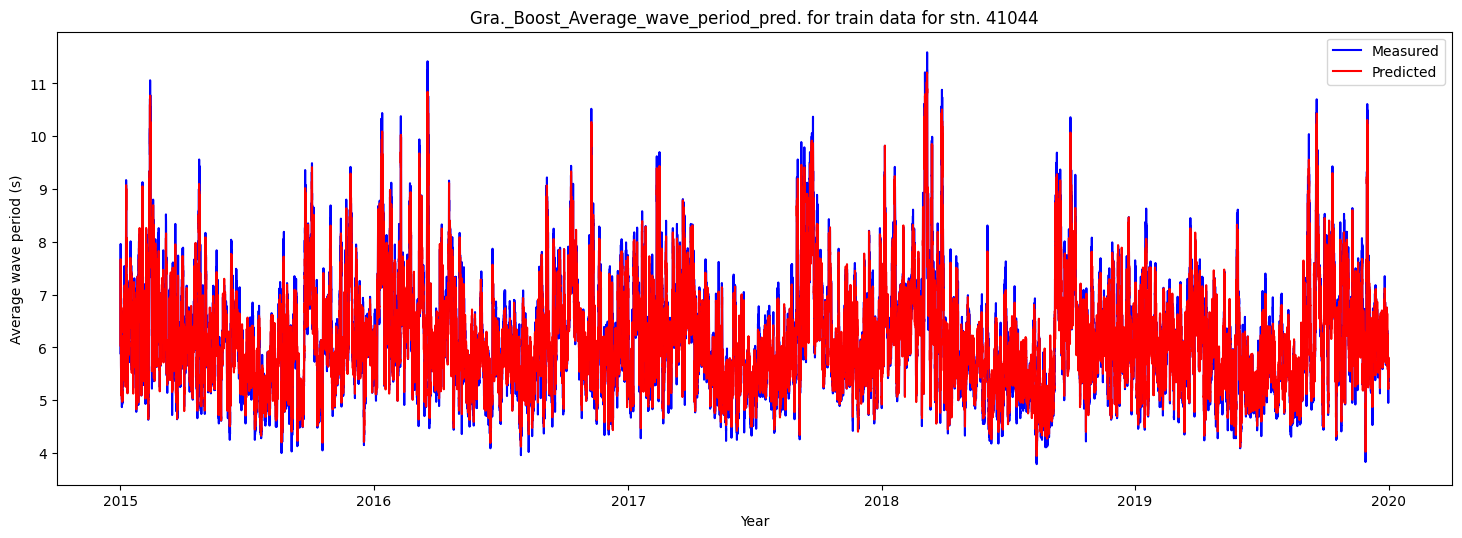

In [11]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(train['Date'], ytrain.ravel(), label='Measured', color='blue')
plt.plot(train['Date'],y_pred, label='Predicted', color='red')
#plt.plot(y_pred, color='green', label='predicted')
plt.title('Gra._Boost_Average_wave_period_pred. for train data for stn. 41044')
plt.xlabel('Year')
plt.ylabel('Average wave period (s)')
plt.legend(loc='upper right')

In [12]:
from sklearn.metrics import r2_score
r2_score(ytrain,y_pred)

0.9678063485452914

In [13]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,y_pred))

0.18023772614502576

In [14]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytrain, y_pred)

0.02139259043976286

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytrain,y_pred)

0.12984973071688477

In [16]:
test=pd.read_excel("41047h_Testing.xlsx")

In [17]:
test

,Date,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,WTMP_deg,DEWP_deg
0,2020-01-01 00:40:00,193,8.1,9.7,1.18,8.33,5.16,134,1015.5,23.7,23.4,18.3
1,2020-01-01 01:40:00,250,7.8,9.8,1.20,7.69,4.83,142,1016.5,23.7,23.4,18.3
2,2020-01-01 02:40:00,5,1.0,2.4,1.17,7.69,4.95,137,1016.6,23.7,23.4,18.3
3,2020-01-01 03:40:00,254,4.6,5.5,1.19,14.81,4.99,74,1016.2,23.7,23.4,18.3
4,2020-01-01 04:40:00,218,4.6,5.6,1.18,4.17,4.86,261,1015.7,23.7,23.4,18.3
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:40:00,193,7.1,9.5,2.21,7.69,6.35,84,1024.9,22.8,22.8,14.4
8780,2020-12-31 20:40:00,193,7.2,9.5,2.17,11.43,6.48,82,1025.5,22.8,22.8,14.2
8781,2020-12-31 21:40:00,193,7.5,9.2,2.04,9.09,6.17,41,1025.7,22.8,22.8,14.2
8782,2020-12-31 22:40:00,193,7.5,10.1,2.06,7.14,6.25,92,1025.8,22.9,22.8,14.1


In [18]:
Xtest=test.iloc[:,[1,2,3,4,5,7,8,10]]

In [19]:
Xtest

,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,MWD_deg,PRES_hpa,WTMP_deg
0,193,8.1,9.7,1.18,8.33,134,1015.5,23.4
1,250,7.8,9.8,1.20,7.69,142,1016.5,23.4
2,5,1.0,2.4,1.17,7.69,137,1016.6,23.4
3,254,4.6,5.5,1.19,14.81,74,1016.2,23.4
4,218,4.6,5.6,1.18,4.17,261,1015.7,23.4
...,...,...,...,...,...,...,...,...
8779,193,7.1,9.5,2.21,7.69,84,1024.9,22.8
8780,193,7.2,9.5,2.17,11.43,82,1025.5,22.8
8781,193,7.5,9.2,2.04,9.09,41,1025.7,22.8
8782,193,7.5,10.1,2.06,7.14,92,1025.8,22.8


In [20]:
ytest=test.iloc[:,[6]]

In [21]:
ytest

,APD_sec
0,5.16
1,4.83
2,4.95
3,4.99
4,4.86
...,...
8779,6.35
8780,6.48
8781,6.17
8782,6.25


In [22]:
ytest_pred=greg.predict(Xtest)

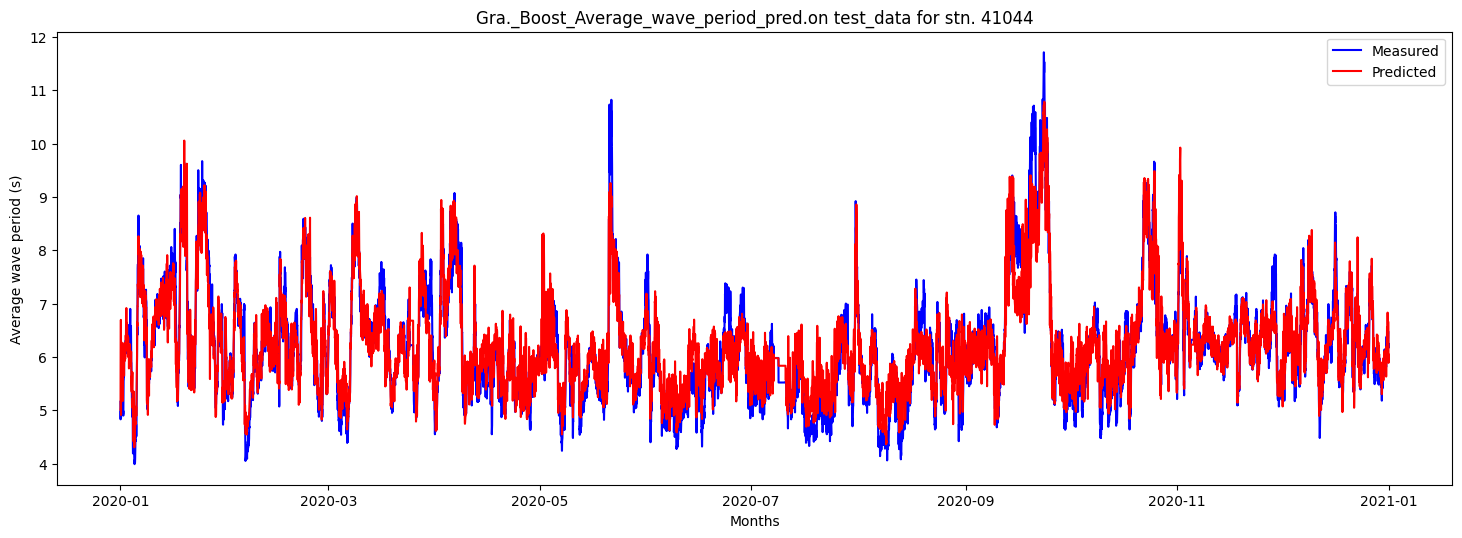

In [23]:
fig = plt.figure(figsize=(18, 6), dpi=100)
plt.plot(test['Date'], ytest, label='Measured', color='blue')
plt.plot(test['Date'],ytest_pred, label='Predicted', color='red')

#plt.plot(y_pred, color='green', label='predicted')
plt.title('Gra._Boost_Average_wave_period_pred.on test_data for stn. 41044')
plt.xlabel('Months')
plt.ylabel('Average wave period (s)')
plt.legend(loc='upper right')

In [24]:
from sklearn.metrics import r2_score
r2_score(ytest,ytest_pred)

0.8248013227168345

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,ytest_pred))

0.4522637825461358

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ytest_pred)

0.3354056071234534

In [27]:
ytest_pred=pd.DataFrame(ytest_pred)

In [28]:
ytest_pred

,0
0,5.011803
1,5.057461
2,6.174547
3,6.693975
4,4.911397
...,...
8779,6.088372
8780,6.662189
8781,6.278526
8782,5.888027


In [29]:
ytest_pred.to_excel("ytest_pred_GBA_search.xlsx")